In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 968053941241833546
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10089332736
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1549189767740819263
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
import os
## GPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
## CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

- 텐서플로 프레임워크 사용
- 사용 라이브러리 : keras
- 텐서플로우 사용버전
    - CUDA 버전에 따라 설치 버전 다양함
    - CUDA 버전은 GPU 버전에 설치 버전 다양함
    - GPU -> RTX3060에 대한 텐서는 보통 2.8.0버전 설치
        - CPU 및 GPU 모두 가능한 버전

In [ ]:
### 텐서플로우 프레임워크(패키지라고도 칭함)
import tensorflow as tf

### 케라스 라이브러리 불러들이기
from tensorflow import keras

### 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 훈련 및 테스트 데이터로 분류하는 라이브러리
from sklearn.model_selection import train_test_split

### 딥러닝 랜덤 규칙 정의하기
# - 딥러닝에서의 랜덤 규칙은 항상 일정하게 유지되지는 않음
# - 딥러닝 모델 내부에서 훈련을 위한 데이터를 임의로 추출하여 사용(사람이 관여 안함)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 데이터 수집하기
##### - 사용데이터 : Fashion MNIST 데이터셋 사용(패션 데이터)

In [ ]:
### keras에서 제공하는 데이터 라이브러리 : Fashion MNIST
# - 이미지 데이터로 되어있음

### 데이터셋 읽어들이기
# - 반환되는 데이터 : train(독립, 종속), test(독립, 종속) 총 4개 데이터 변수로 반환됨
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
### 이미지 1개 데이터 확인해보기
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

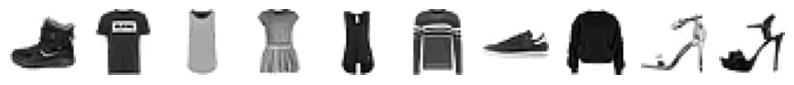

In [ ]:
### 픽셀 데이터를 이용해서 이미지 시각화 하기
# - 훈련 데이터 상위 10개 이미지만  그려보기
# - 이미지 시각화 시에는 --> 3차원 원본 데이터를 그대로 사용
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10) :
    axs[i].imshow(train_input[i], cmap="gray_r")
    axs[i].axis("off")

plt.show()

In [7]:
### 훈련 데이터 상위 10개에 대한 종속변수 확인하기
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
### 훈련 종속변수의 고유한값들만 출력해주세요..
# 각 고유한 값들이 몇개씩 있는지도 함께 출력...

np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

### 이미지 데이터(픽셀) 스케일링 처리하기

In [9]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
### 이미지 픽셀 데이터를 0~1사이의 값으로 변환하기
# - 이미지 픽셀 데이터의 범위는 0~255의 범위값으로 구성되어 있음
# - 따라서, 각 픽셀의 값을 255로 나눠주면, 0~1사이의 값으로 일반화가 가능함
# - 훈련 및 테스트 독립변수의 데이터를 모두 255로 나누어서 전처리하기
#   (255.0의 소숫점으로 나눠줍니다.)
train_scaled_255 = train_input / 255.0
test_scaled_255  = test_input / 255.0

In [11]:
train_scaled_255[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
print(train_scaled_255.shape, train_target.shape)
print(test_scaled_255.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 모델 훈련을 위한 데이터 차원을 2차원으로 변환하기

In [13]:
### (60000, 28, 28) = (축, 행, 열) => 3차원
# - 축은 행으로, 행열을 곱해서 열로 처리 => 2차원
# - 차원을 변경하는 함수 : reshpae()
train_scaled_2d = train_scaled_255.reshape(-1, 28 * 28)
test_scaled_2d  = test_scaled_255.reshape(-1, 28 * 28)

print(train_scaled_2d.shape, train_target.shape)
print(test_scaled_2d.shape, test_target.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### 훈련 : 검증 = 8 : 2로 분리하기

In [14]:
### 훈련(train_scaled, train_target)
### 검증(val_scaled, val_target)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled_2d, train_target, test_size=0.2, random_state=42
)

print(train_scaled.shape,   train_target.shape)
print(val_scaled.shape,     val_target.shape)
print(test_scaled_2d.shape, test_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 784) (10000,)


### 인공신경망 모델 훈련 시키기

<딥러닝 모델 훈련 순서>
- 1. 모델 생성하기 : 딥러닝에서는 모델은 껍데기임(2번과 1번은 순서 바뀌어도 무관함)
- 2. 모델에 계층(Layer) 생성하기 : 계층이 실제 훈련을 수행(수많은 알고리즘이 들어 있음)
- 3. 모델 환경 설정하기 : 컴파일(Compile) 설정이라고 칭함 (수많은 알고리즘이 활용 됨)
- 4. 모델 훈련 시키기 : fit()
- 5. 모델 성능 검증하기 (평가하기)
    - 딥러닝 결과는 손실율 및 정확도를 기준으로 평가함
    - 과대/과소 적합 여부는 손실율을 기준으로 함
    - 스스로 반복 수행하면서 오차(손실율)를 줄여나가면서 훈련함
- 6. 성능 개선(튜닝)
    - 데이터 양 증가시키기 (딥러닝에서는 데이터양이 성능에 매우 큰 영향을 미침)
    - 하이퍼파라메터 튜닝
    - 계층 추가 또는 삭제

- 7. 예측하기 : predict()

- 신경망 종류
    - 인공신경망, 심층신경망

- 인공신경망(Artificial Neural Network, ANN)>
    - 은닉계층(Hidden Layer)이 없는 경우
    - 입력계층 + 출력계층 또는 입/출력 계층만 사용하는 경우
    - 1개인 계층 : 입력 - 계층을 1개 또는 2개를 사용함

    - (Input)과 출력(Output)을 동시에 담당하는 계층
        - 2개인 계층 : 입력계층(Input Layer)과, 출력계층(Output Layer) 2개 사용됨

- 심층신경망(Deep Neural Network, DNN)
    - 은닉계층(Hidden Layer)이 있는 경우
    - 입력계층 + 은닉계층...n개 + 출력계층
    - 계층이 3개 이상 사용함
    - 첫번째 계층 : 입력계층(Input Layer)
    - 중간계층
        - 은닉계층(Hidden Layer)
        - 히든 계층이라고도 칭함, 여러개 계층 존재 가능
    - 마지막 계층 : 출력계층(Output Layer)

- 계층
    - 계층은 여러 계층이 존재함
    - 훈련에 참여하는 계층과 훈련에 참여하지 않는 계층으로 구분함
    - 훈련에 참여하는 계층은 주로 Dense()로 생성이 됨
    - 훈련에 참여하지 않는 계층을 "전처리 계층" 이라고 함

- Dense()
    - 딥러닝에서 사용되는 가장 기본적인 계층(클래스)
    - 훈련에 참여하는 계층(성능에 영향을 미침)
           
- units
    - 출력의 갯수를 정의함. 즉, 범주의 갯수를 의미함(범주 10개)
    - units 속성은 출력계층(Output Layer)에 정의됩니다.
    - units이라는 이름은 생략가능
        - 단, 입력과 출력계층을 동시에 사용되는 경우에는 생략하면 안됨
 
- kernel_initializer : 성능을 높이기 위해 가중치를 초기화하는 방법 지정
    - 가중치 : 손실을 최소화 하기위해, 모델이 훈련을 반복하는 과정에서 스스로 성능을 높이기 위해 조정하는 값을 의미함

    - 가중치 초기화 방법
        - uniform : 균일 분포 방법(훈련 반복 시에 균일하게 가중치를 부여함)
        - normal  : 가우시안 분포(정규분포) 방법(훈련 반복 시에 정규분포를 고려하여 가중치를 부여함)
    - 초기화 방법은 사람이 정의하지만, 훈련 반복중에 사용되는 가중치 값은 모델 스스로 사용하게 됨(사람이 관여하지 못함)
       
- activation : "활성화 함수"라고 칭함
    - 훈련 시 입력된 특성의 갯수를, 어떤 형태의 크기(범주의 갯수)로 변환할지를 결정하는 방법을 제시함(이 방법을 함수로 칭함)
 
    - 주로 출력계층(Output Layer)에 적용(은닉계층이 있는 경우에는 은닉계층에도 적용)
    - 활성화 함수는 범주의 갯수(종속변수의 갯수)에 따라서 결정
    
    - 활성화 함수 분류 방법
    * 회귀분석의 경우 : linear 사용 (디폴트 값으로 사용됨)
        - 출력계층에 주로 사용됨
     
    * 분류분석의 경우(이진분류) : sigmoid, relu, tanh, ReakyRelu 중에 사용(0과 1 둘중 하나 선택)
        - sigmoid : 출력 또는 은닉계층에 주로 사용됨(주로 출력)
        - relu : 은닉계층에 사용됨
        - tanh : 은닉계층에 사용됨
        - ReakyRelu : 은닉계층에 사용됨
       
       
    - 이진분류 활설화 함수
        * sigmoid
            - 보통 출력계층(가장 마지막 계층)에 주로 사용
            - 단점, 은닉계층에 사용시 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 어려움이 있음
                - 이는 훈련을 거듭할 수록 누적되기에 성능이 좋아지지 않은 경향을 보임
        * relu
            - sigmoid의 50% 시점으로 분류하지 않고 0을 기준으로 0과 1로 분류함(단점을 보완)
            - 기울기가 급함(완만함을 보완하였음)
        * 나머지 : relu를 보완한 향상된 함수
       
    * 분류분석의 경우(다중분류) : softmax (여러 범주 중 하나 선택)


- input_shape : 입력할 특성(뉴런)의 갯수를 정의함. 주로 입력계층(Input Layer)에 사용됨

In [16]:
### 2. 훈련 계층 생성하기 : 계층(layer), 생성함수(Dense)
# - Dense() : 훈련에 영향을 미치는 함수
dense = keras.layers.Dense(
    units = 10,
    kernel_initializer = "uniform",
    activation = "softmax",
    input_shape = (784, )
)

dense

In [ ]:
### 1. 인공신경망 모델 객체 생성하기
# - 생성된 계층이 사전에 존재하는 경우
model = keras.Sequential([dense])
model

- compile() : 손실을 줄이기 위한 방법을 설정하는 함수(역전파 담당)
- loss : 손실을 줄이기 위해 사용되는 함수 설정(손실함수라고 칭함)
    - 손실함수에는 categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy가 있슴

- 손실함수
    * categorical_crossentropy
        - 다중분류에 사용됨(특별한 경우에만 사용됨)
        - 단, 종속변수 값의 형태가 원-핫인코딩된 데이터인 경우에 사용
        - 원-핫인코딩 종속변수 형태 : [[0, 0, 1], [0, 1, 0], [1, 0, 0] ...]
 
    * sparse_categorical_crossentropy
        - 다중분류에 사용됨(분류에서 주로 사용됨)
        - 종속변수 형태 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...]
 
    * binary_crossentropy
        - 이진분류에 사용됨
        - 종속변수 형태 : [0, 1, 1, 0, 0, 1...]
   
- metrics : 훈련시 출력할 값 -> 정확도 값 출력(손실률은 기본적으로 출력됨)

In [ ]:
### 3.모델 환경 설정하기
# - 컴파일(compile) 설정이라고 칭함
# - 오차를 줄이는 작업을 수행하는 설정
model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
### 4. 모델 훈련시키기
# - fit()만 재실행하면, 기존의 훈련에서 계속 이어서 수행하게 됨
# - 깨끗한 상태로 재실행(초기화)하려면, 모델 생성부터 다시 실행해야 함
# - epochs : 훈련 반복 횟수
#          : 훈련을 반복하면서 스스로 가중치를 부여하면서 성능을 높여감
#          : 반복 횟수가 많다고 해서 성능일 좋아진다고 볼 수는 없슴
#            (좋아질수도, 나빠질수도 있음)
#          : 성능에 영향을 미치는 값 -> 하이퍼파라메터 튜닝 대상


# - 최적의 epoch 확인 방법
#   : loss(손실율)은 낮고, accuracy(정확도)는 높은 시점의 epoch를 선정


# - 훈련에 사용된 데이터 갯수 : 1500
# 1500/1500 = 총 데이터 갯수 / 배치사이즈(기본값 32)
#           = 훈련데이터 48,000건 / 기본값 32 = 1,500

In [19]:
### 4. 모델 훈련 시키기 : fit()
with tf.device("/CPU:0") :
    model.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6028 - accuracy: 0.7960
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4773 - accuracy: 0.8391
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4555 - accuracy: 0.8476
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8539
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4351 - accuracy: 0.8554
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4322 - accuracy: 0.8582
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4270 - accuracy: 0.8590
Epoch 8/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4242 - accuracy: 0.8598
Epoch 9/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.8613
Epoch 10/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.420

In [20]:
### 5. 모델 성능 검증하기
score = model.evaluate(val_scaled, val_target)
score

375/375 [==============================] - 2s 2ms/step - loss: 0.4838 - accuracy: 0.8512


[0.4837850034236908, 0.8512499928474426]

In [21]:
print(f"손실율 : {score[0]}, 정확도 : {score[1]}")

손실율 : 0.4837850034236908, 정확도 : 0.8512499928474426


In [ ]:
### 현재까지 사용한 모델의 구조 출력하기
model.summary()


### 모델에서 사용한 계층 확인하기
# - Model: "sequential" : 모델 이름
# - Layer (type) : 모델 이름
# - Output Shape : 출력 갯수(크기)
# - Param : 훈련 중에 사용된 특성의 총 갯수
#   (Param 계산방법) : 모델이 알아서 하기에 몰라도 됨
#    Param = (입력의 갯수 + 1) * 출력 갯수
#          = (784        + 1) * 10
#          = 7850

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
